In [1]:
import os 
import sys 

sys.path.insert(0, '..')

In [2]:
from bio_check import Verifier
from pprint import pp

In [3]:
sbml_fp = "../model-examples/sbml-core/Elowitz-Nature-2000-Repressilator/BIOMD0000000012_url.xml"
omex_fp = sbml_fp.replace("/BIOMD0000000012_url.xml", ".omex")
report_fp = omex_fp.replace(".omex", "/reports.h5")
duration = 10
nsteps = 100 
comparison_id = "test_notebook_sbml0"
simulators = ["copasi", "tellurium"]
selection_list = ["cI mRNA"]

In [4]:
verify = Verifier()

{'bio-check-message': 'Hello from the Verification Service API!'}


In [5]:
# inspect public methods and attributes

_dir = dir(verify)

for m in _dir:
    print(m) if not m.startswith("_") else None

data
endpoint_root
export_csv
get_compatible
get_verify_output
select_observables
verify_omex
verify_sbml
visualize


In [6]:
# submit a new verification 

submission_1 = verify.verify_sbml(sbml_filepath=sbml_fp, comparison_id=comparison_id, duration=duration, number_of_steps=nsteps, simulators=simulators)

In [7]:
submission_1

RequestError(error='422 Client Error: Unprocessable Entity for url: https://biochecknet.biosimulations.org/verify-sbml')

In [5]:
submission_2 = verify.verify_omex(omex_filepath=omex_fp, comparison_id=comparison_id, truth=report_fp)

Selection list: None


In [6]:
submission_2

{'job_id': 'utc_comparison_omex_caf121e9-65de-477e-8141-f36bf75f4df8',
 'status': 'PENDING',
 'timestamp': '2024-08-01 16:02:03.886108',
 'comparison_id': None,
 'path': 'uploads/utc_comparison_omex_caf121e9-65de-477e-8141-f36bf75f4df8/Elowitz-Nature-2000-Repressilator.omex',
 'simulators': ['amici', 'copasi', 'tellurium'],
 'ground_truth_report_path': None,
 'include_output': True,
 'rTol': None,
 'aTol': None,
 'selection_list': None}

In [5]:
# use job id generated from submission to poll gateway

omex_job_id = submission_2['job_id']

verify.get_verify_output(omex_job_id)

NameError: name 'submission_2' is not defined

In [8]:
# we can call this multiple times until ready

verify.get_verify_output(omex_job_id)

{'content': {'status': 'PENDING',
  'job_id': 'utc_comparison_omex_caf121e9-65de-477e-8141-f36bf75f4df8',
  'path': 'uploads/utc_comparison_omex_caf121e9-65de-477e-8141-f36bf75f4df8/Elowitz-Nature-2000-Repressilator.omex',
  'simulators': ['amici', 'copasi', 'tellurium'],
  'timestamp': '2024-08-01 16:02:03.886108',
  'ground_truth_report_path': None,
  'include_outputs': True,
  'rTol': None,
  'aTol': None,
  'selection_list': None}}

In [9]:
output = verify.get_verify_output(omex_job_id)

In [10]:
pp(output)

{'content': {'status': 'PENDING',
             'job_id': 'utc_comparison_omex_caf121e9-65de-477e-8141-f36bf75f4df8',
             'path': 'uploads/utc_comparison_omex_caf121e9-65de-477e-8141-f36bf75f4df8/Elowitz-Nature-2000-Repressilator.omex',
             'simulators': ['amici', 'copasi', 'tellurium'],
             'timestamp': '2024-08-01 16:02:03.886108',
             'ground_truth_report_path': None,
             'include_outputs': True,
             'rTol': None,
             'aTol': None,
             'selection_list': None}}


{'content': {'job_id': 'utc_comparison_omex_caf121e9-65de-477e-8141-f36bf75f4df8',
  'status': 'COMPLETED',
  'timestamp': '2024-08-01 16:04:53.987044',
  'results': {'results': {'LacI protein': {'mse': {'amici': {'amici': 0.0,
       'copasi': 2850497.1348808077,
       'tellurium': 0.00044158302559360634},
      'copasi': {'amici': 2850497.1348808077,
       'copasi': 0.0,
       'tellurium': 2850499.805138773},
      'tellurium': {'amici': 0.00044158302559360634,
       'copasi': 2850499.805138773,
       'tellurium': 0.0}},
     'proximity': {'amici': {'amici': True,
       'copasi': False,
       'tellurium': True},
      'copasi': {'amici': False, 'copasi': True, 'tellurium': False},
      'tellurium': {'amici': True, 'copasi': False, 'tellurium': True}},
     'output_data': {'amici': [1971.2685725983274,
       2056.478842725034,
       2133.4750014522638,
       2200.7609953341134,
       2256.9624325043765,
       2300.8927338252797,
       2331.620371915326,
       2348.52984

In [10]:
# use selection list to return only one observable

selection_list = ["cI mRNA"]

submission_3 = verify.verify_omex(omex_filepath=omex_fp, comparison_id="notebook_test_omex2", truth=report_fp, selection_list=selection_list)

Selection list: ['cI mRNA']


In [12]:
submission_3

{'job_id': 'utc_comparison_13f90f11-0782-4cfe-9201-12d3354dcf59',
 'status': 'PENDING',
 'timestamp': '2024-07-31 18:19:29.952549',
 'comparison_id': 'utc_comparison',
 'path': 'uploads/utc_comparison_13f90f11-0782-4cfe-9201-12d3354dcf59/Elowitz-Nature-2000-Repressilator.omex',
 'simulators': ['amici', 'copasi', 'tellurium'],
 'ground_truth_report_path': None,
 'include_output': True,
 'rTol': None,
 'aTol': None,
 'selection_list': None}

In [13]:
verify.verify_omex(omex_filepath=omex_fp, comparison_id="notebook_test_omex2", truth=report_fp, selection_list=selection_list)

Selection list: ['cI mRNA']


{'job_id': 'utc_comparison_e50a4894-3ac5-4263-ac2c-734149cfac31',
 'status': 'PENDING',
 'timestamp': '2024-07-31 18:23:05.460839',
 'comparison_id': 'utc_comparison',
 'path': 'uploads/utc_comparison_e50a4894-3ac5-4263-ac2c-734149cfac31/Elowitz-Nature-2000-Repressilator.omex',
 'simulators': ['amici', 'copasi', 'tellurium'],
 'ground_truth_report_path': None,
 'include_output': True,
 'rTol': None,
 'aTol': None,
 'selection_list': None}

In [14]:
import requests 

job_id = 'utc_comparison_e50a4894-3ac5-4263-ac2c-734149cfac31'
piece = f'fetch-results/{job_id}'
endpoint = verify._format_endpoint(piece)
headers = {'Accept': 'application/json'}
try:
    response = requests.get(endpoint, headers=headers)
    verify._check_response(response)
    data = response.json()
    verify.data[job_id] = data
    print(data)
except Exception as e:
    print(str(e))

{'content': {'status': 'PENDING', 'job_id': 'utc_comparison_e50a4894-3ac5-4263-ac2c-734149cfac31', 'path': 'uploads/utc_comparison_e50a4894-3ac5-4263-ac2c-734149cfac31/Elowitz-Nature-2000-Repressilator.omex', 'simulators': ['amici', 'copasi', 'tellurium'], 'comparison_id': 'utc_comparison', 'timestamp': '2024-07-31 18:23:05.460839', 'ground_truth_report_path': None, 'include_outputs': True, 'rTol': None, 'aTol': None, 'selection_list': None}}


In [55]:
test_data = verify.get_verify_output(omex_job_id)

test_data['content']['results']['results']['cI mRNA']['output_data'].keys()

dict_keys(['amici', 'copasi', 'tellurium'])

In [17]:
import seaborn as sns 
import matplotlib.pyplot as plt


def visualize(data: dict):
    """Visualize simulation output data, not comparison data!"""
    plt.figure(figsize=(20, 8))
    for species_name, species_data in data['content']['results']['results'].items():
        output_data = species_data.get('output_data')
        if output_data is not None:
            for simulator_name, simulator_output in output_data.items():
                sns.lineplot(data=simulator_output, label=f"{species_name}_{simulator_name}")
    
    plt.legend()
    plt.grid(True)
    plt.title("Comparison")
    return plt.show()
            

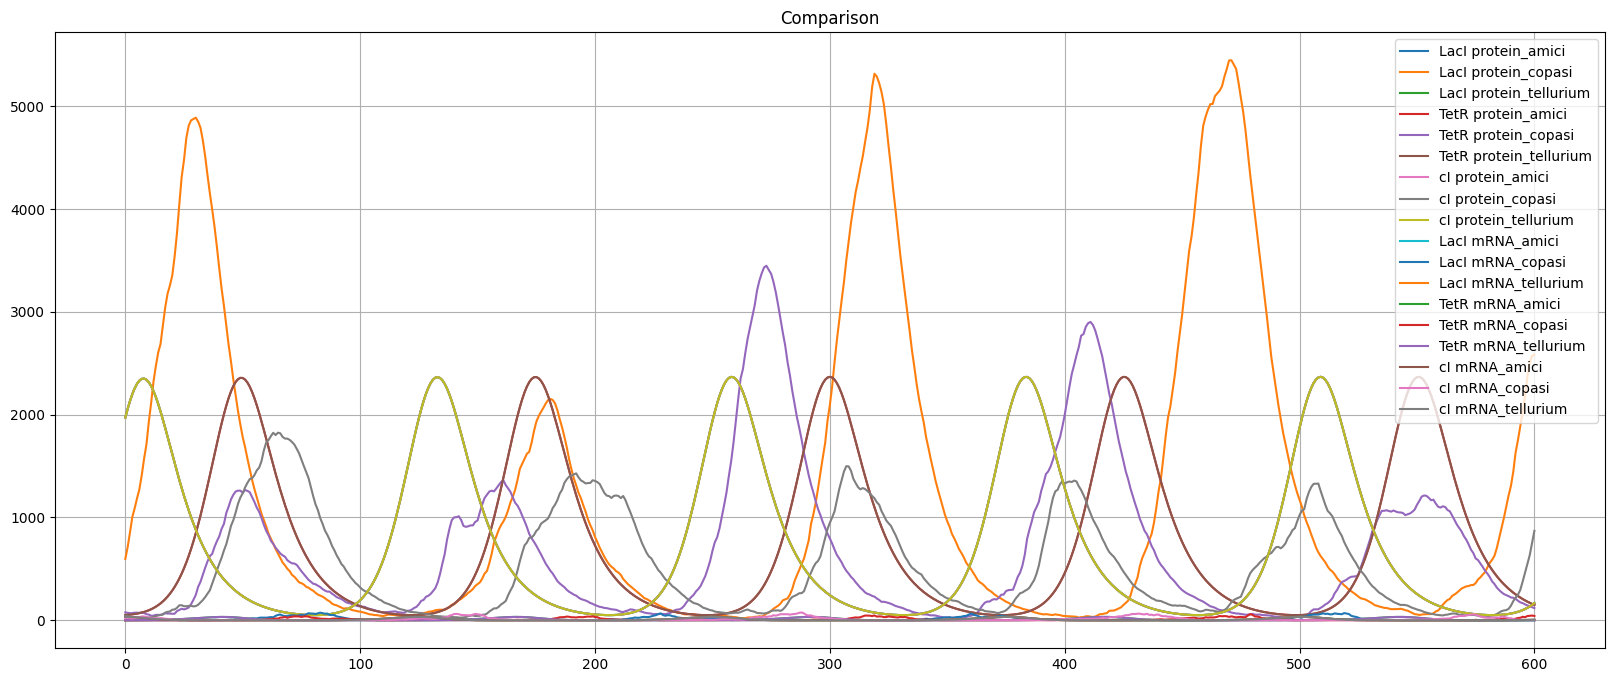

In [18]:
visualize(test_data)

In [41]:
for i, v in enumerate({'a': 3, 'b': 4, 'c': 5, 'd': 6, 'e': 7}.items()):
    k = v[0]
    val = v[1]
    print(k, val)

a 3
b 4
c 5
d 6
e 7


(5, 3)

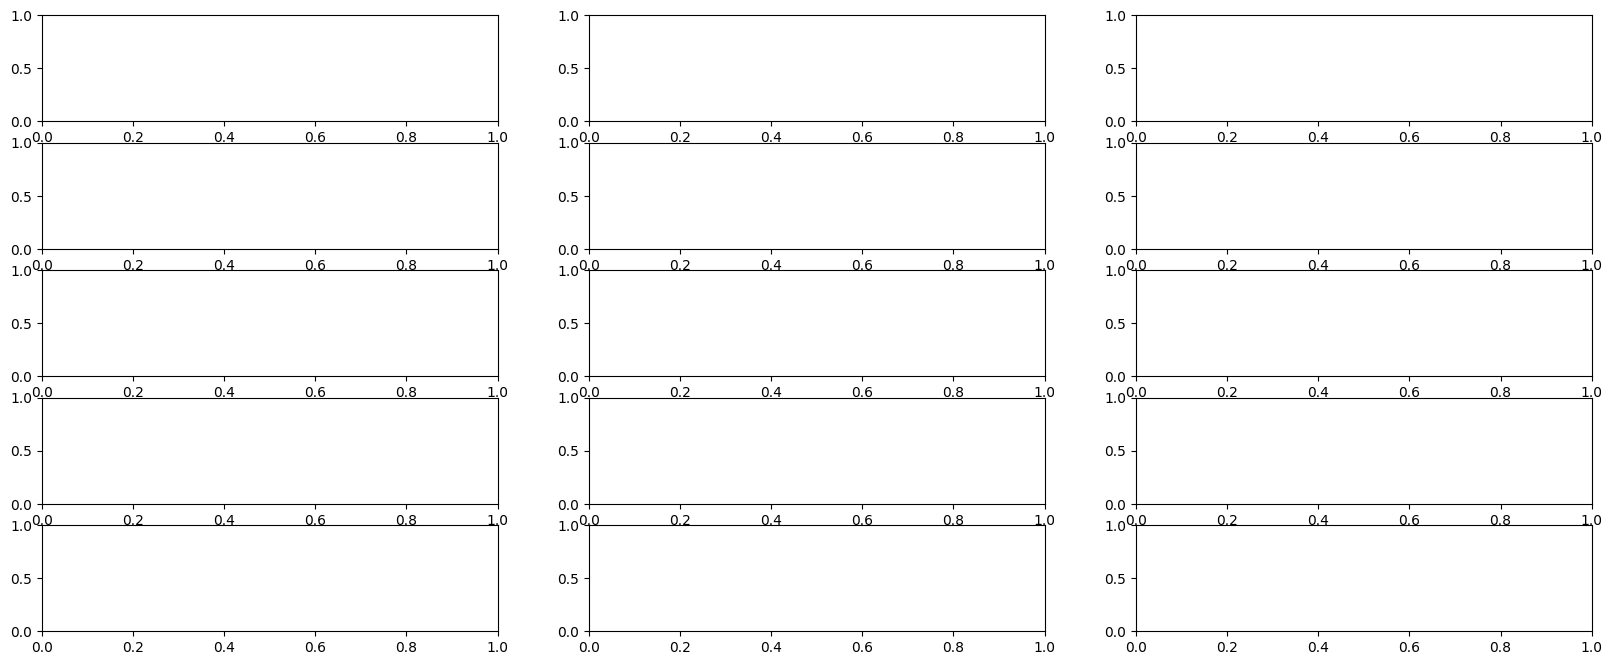

In [43]:
f, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 8))


axes.shape

Axes(0.125,0.77;0.227941x0.11)
Axes(0.398529,0.77;0.227941x0.11)
Axes(0.672059,0.77;0.227941x0.11)
Axes(0.125,0.638;0.227941x0.11)
Axes(0.398529,0.638;0.227941x0.11)
Axes(0.672059,0.638;0.227941x0.11)
Axes(0.125,0.506;0.227941x0.11)
Axes(0.398529,0.506;0.227941x0.11)
Axes(0.672059,0.506;0.227941x0.11)
Axes(0.125,0.374;0.227941x0.11)
Axes(0.398529,0.374;0.227941x0.11)
Axes(0.672059,0.374;0.227941x0.11)
Axes(0.125,0.242;0.227941x0.11)
Axes(0.398529,0.242;0.227941x0.11)
Axes(0.672059,0.242;0.227941x0.11)
Axes(0.125,0.11;0.227941x0.11)
Axes(0.398529,0.11;0.227941x0.11)
Axes(0.672059,0.11;0.227941x0.11)
(6, 3)


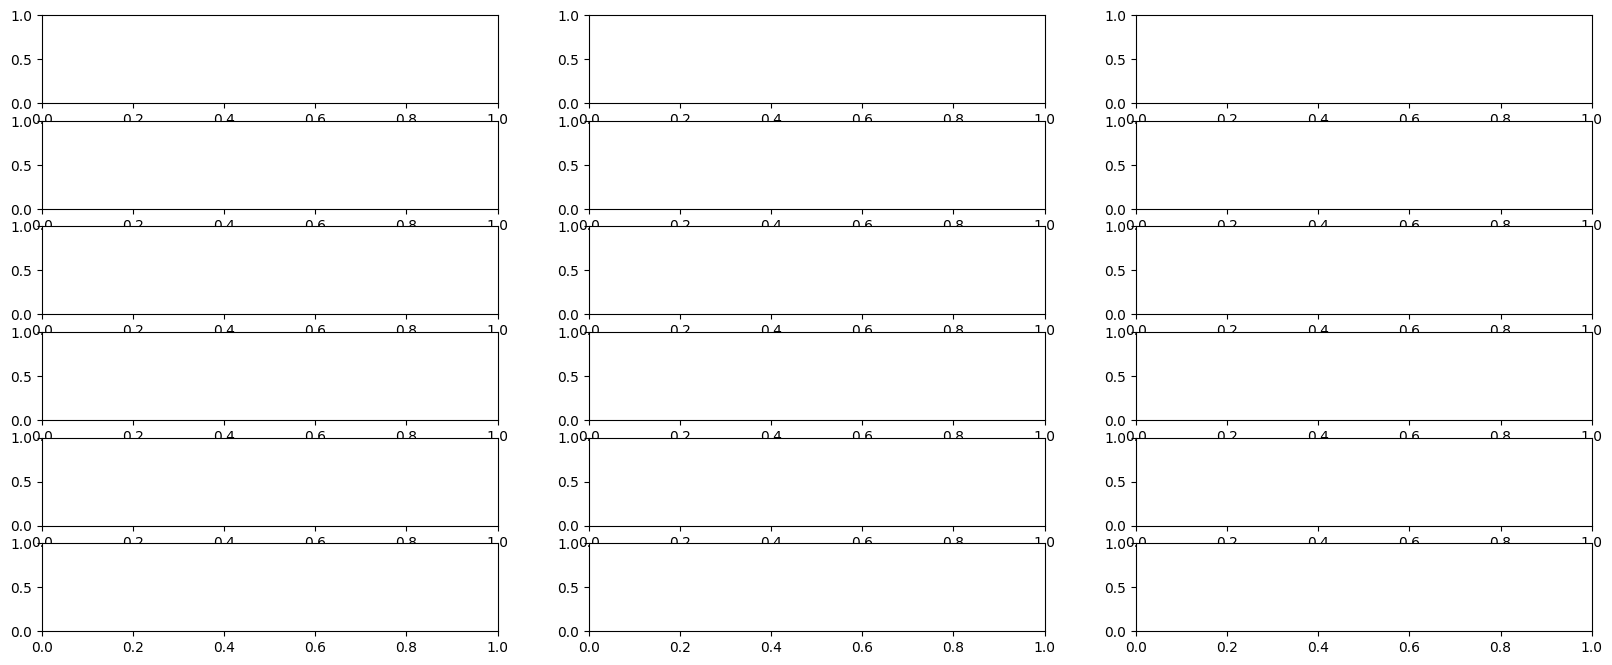

In [51]:
species_data_content = test_data['content']['results']['results']
species_names = list(species_data_content.keys())

sims = ['amici', 'copasi', 'tellurium']

fig, axes = plt.subplots(nrows=len(species_names), ncols=len(sims), figsize=(20, 8))

for i, species_name in enumerate(species_names):
    for j, sim in enumerate(sims):
        print(axes[i][j])
print(axes.shape)

In [69]:
import numpy as np 



(601,)

In [70]:
for name in species_names:
    data = species_data_content[name]['output_data']
    for simname in data.keys():
        print(len(data[simname]))

601
601
601
601
601
601
601
601
601
601
601
601
601
601
601
601
601
601


In [75]:
import numpy as np
import seaborn as sns


def generate_color_gradient(simulator_names) -> list[str]:
    """Generate a gradient of colors from red to green to blue for a list of simulator names."""
    num_simulators = len(simulator_names)
    
    red_to_green = np.linspace([1, 0, 0], [0, 1, 0], num=int(np.ceil(num_simulators / 2)), endpoint=False)
    green_to_blue = np.linspace([0, 1, 0], [0, 0, 1], num=int(np.ceil(num_simulators / 2 + 1)))
    
    full_gradient = np.vstack([red_to_green, green_to_blue])[1:num_simulators + 1]
    
    hex_colors = ['#{:02x}{:02x}{:02x}'.format(int(r*255), int(g*255), int(b*255)) for r, g, b in full_gradient]
    
    return hex_colors


def visualize(
        data: dict, 
        simulators: list[str], 
        output_start: int, 
        output_end: int, 
        num_points: int, 
        hue: str = 'simulators',
        use_grid=False
) -> None:
    """Visualize simulation output data, not comparison data, with subplots for each species.
        
        Args:
            data (dict): simulation output data
            simulators (list[str]): list of simulators
            output_start (int): start time of simulation output recording.
            output_end (int): end time of simulation output recording.
            num_points (int): number of points in simulation output time series.
            hue (str): hue upon which the linplot colors are based. Options are: `'simulators'` or `'species'`. Defaults to 'simulators'.
            use_grid (bool): whether to use a grid for each subplot. Defaults to False.
    
    """
    # grid plot params
    species_data_content = data['content']['results']['results']
    species_names = list(species_data_content.keys())
    num_species = len(species_names)
    
    # plot data params
    t = np.linspace(output_start, output_end, num_points)  # TODO: extract this dynamically.
    simulator_colors = generate_color_gradient(simulators)
    
    # TODO: extract simulator names dynamically as well.
    
    fig, axes = plt.subplots(nrows=num_species, ncols=3, figsize=(20, 6 * num_species)) 
    
    if num_species == 1:
        axes = [axes]
    
    # iterate over grid rows
    for i, species_name in enumerate(species_names):
        # iterate over grid cols
        for j, simulator_name in enumerate(simulators):
            ax = axes[i][j]
            species_data = data['content']['results']['results'][species_name]
            output_data = species_data.get('output_data')
            
            if output_data:  
                # create one plot in each column mapped to each individual simulator output (for clarity :) )
                simulator_output = output_data[simulator_name]
                sns.lineplot(ax=ax, color=simulator_colors[j], data=simulator_output, label=f"{simulator_name}")

                # set row title
                ax.set_title(f"{species_name} simulation outputs for {simulator_name}")
                ax.legend()
                ax.grid(use_grid)
    
    # TODO: adjust this 
    plt.tight_layout()
    plt.show()

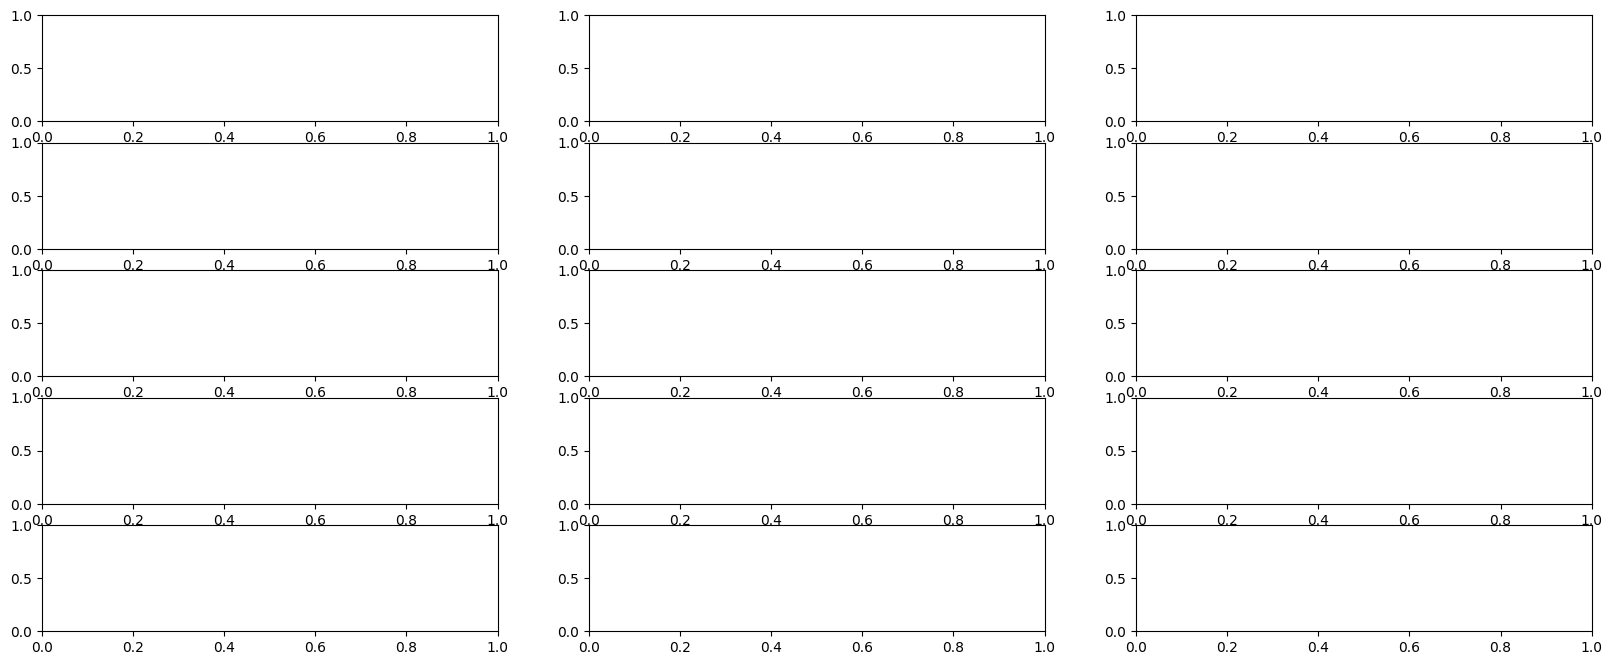

In [78]:
f

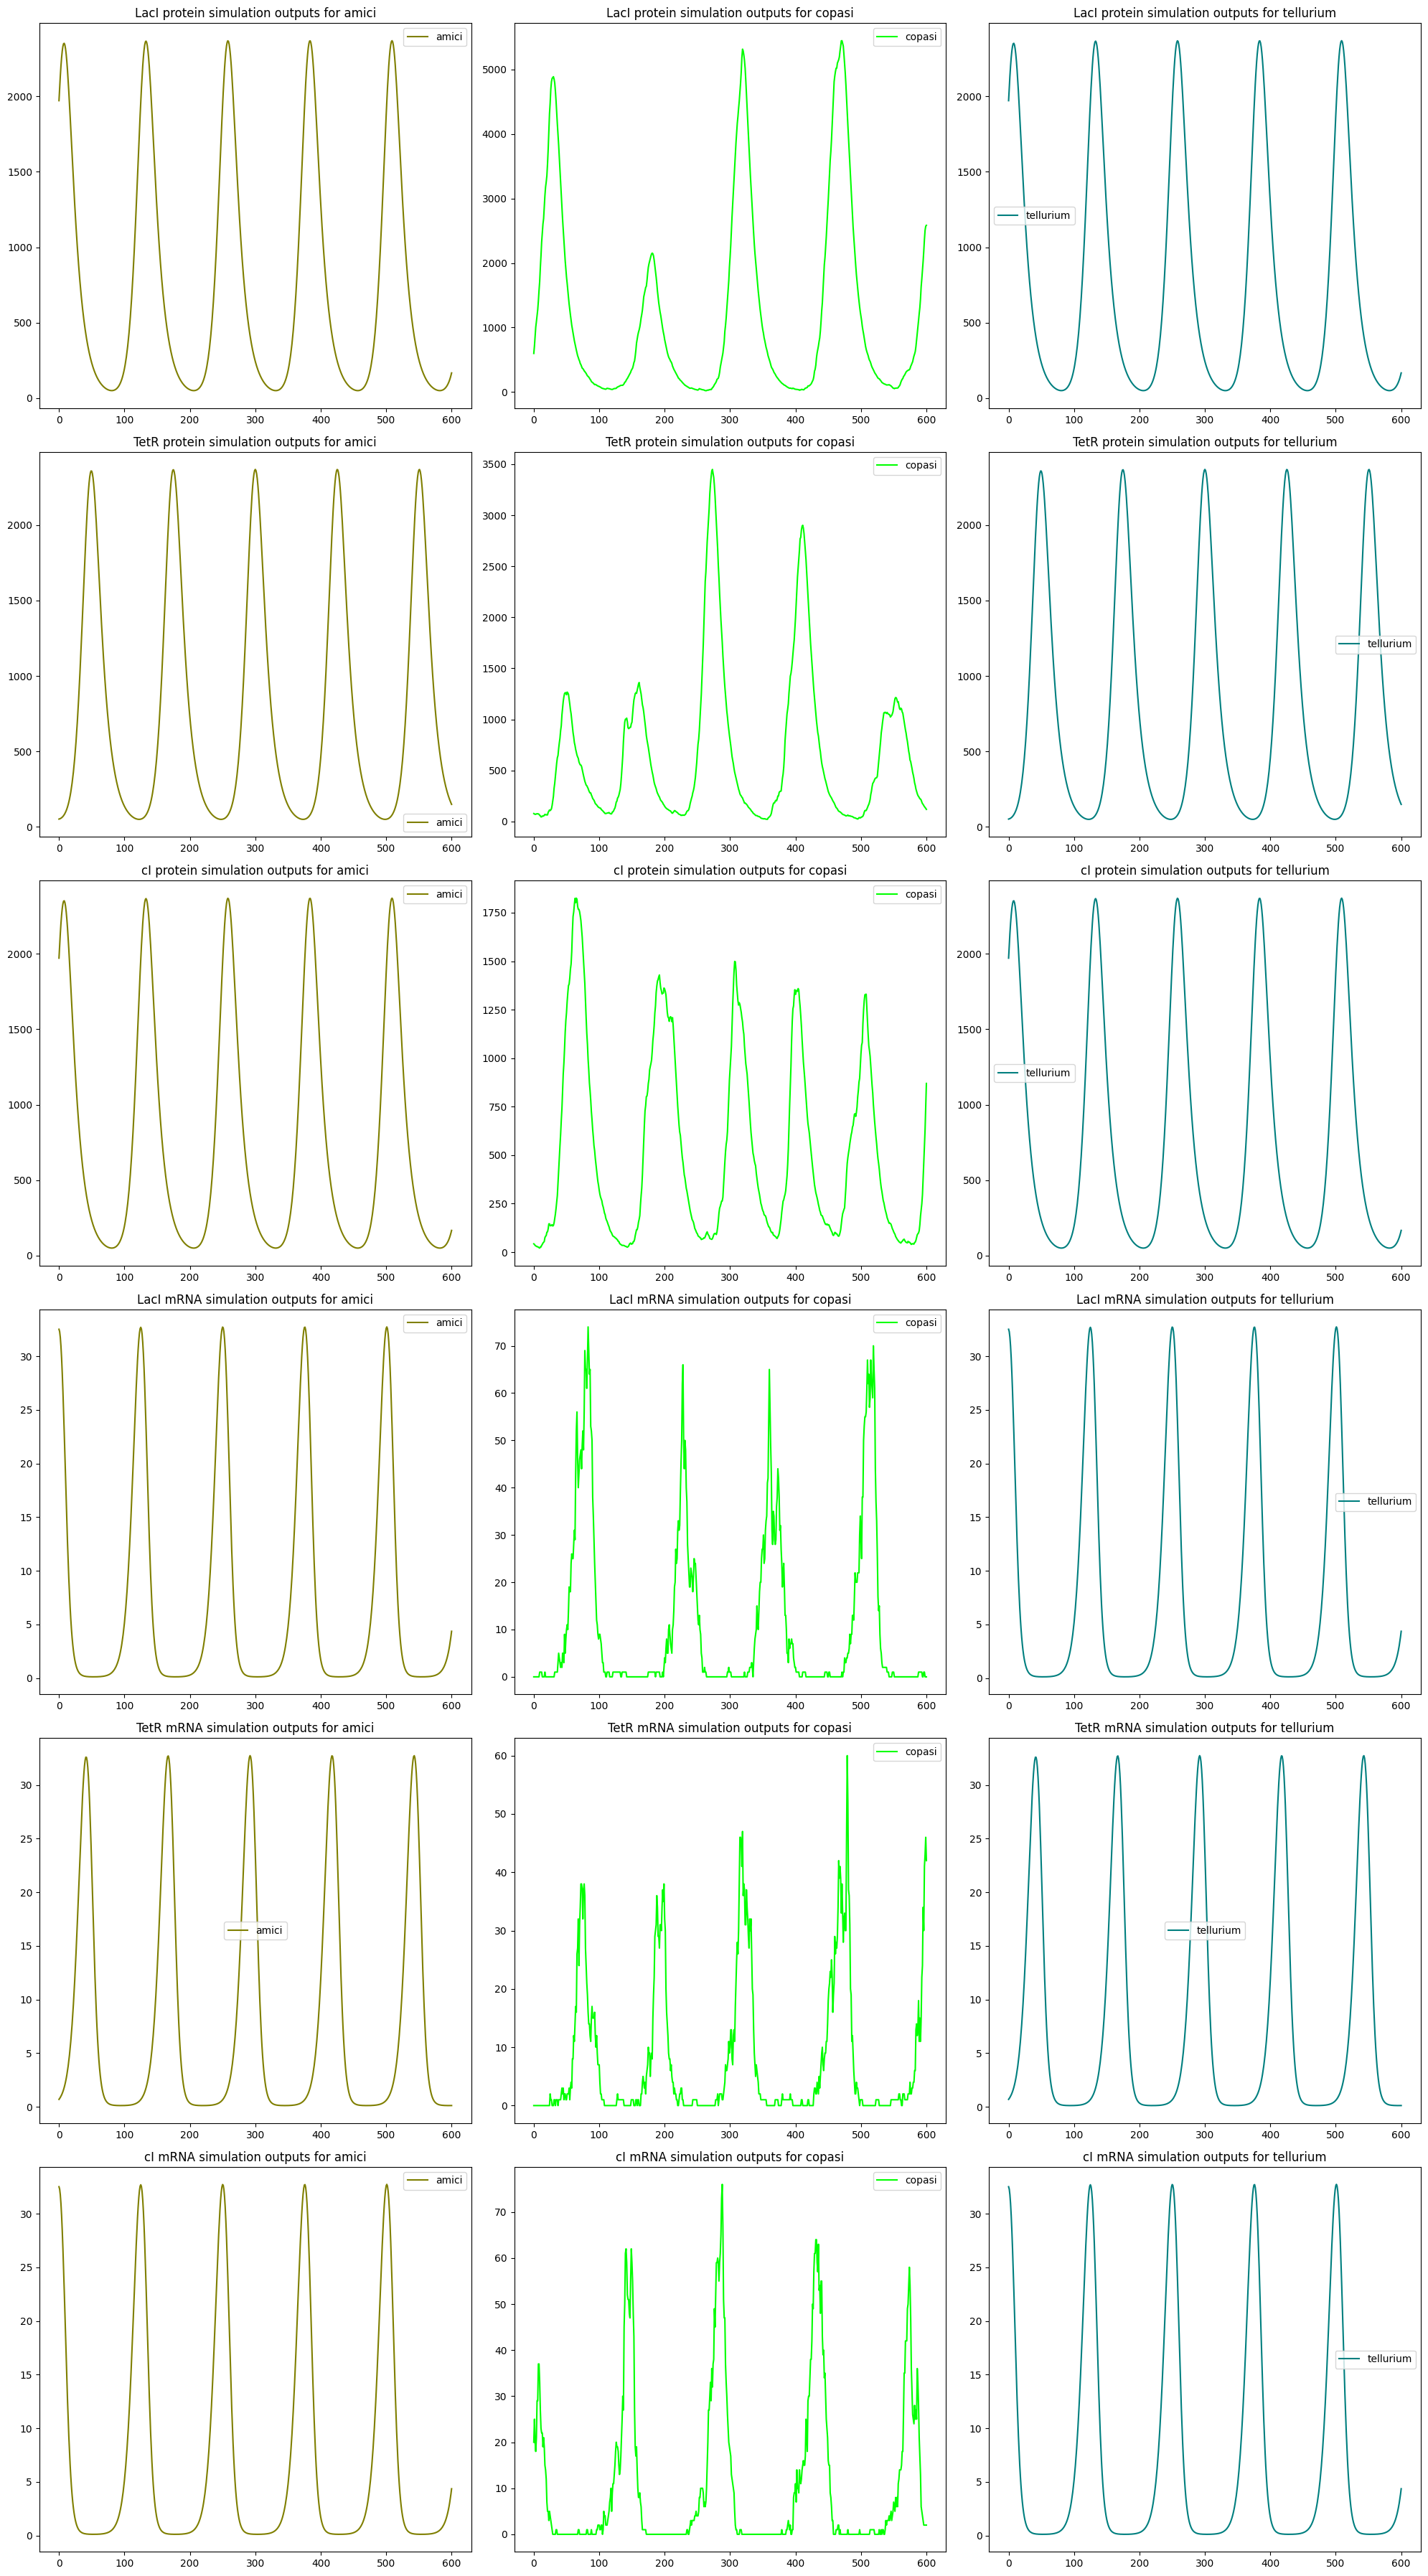

In [76]:
t = np.linspace(400, 1000, 601)
visualize(test_data, sims, t[0], t[-1], num_points=t.shape[0])

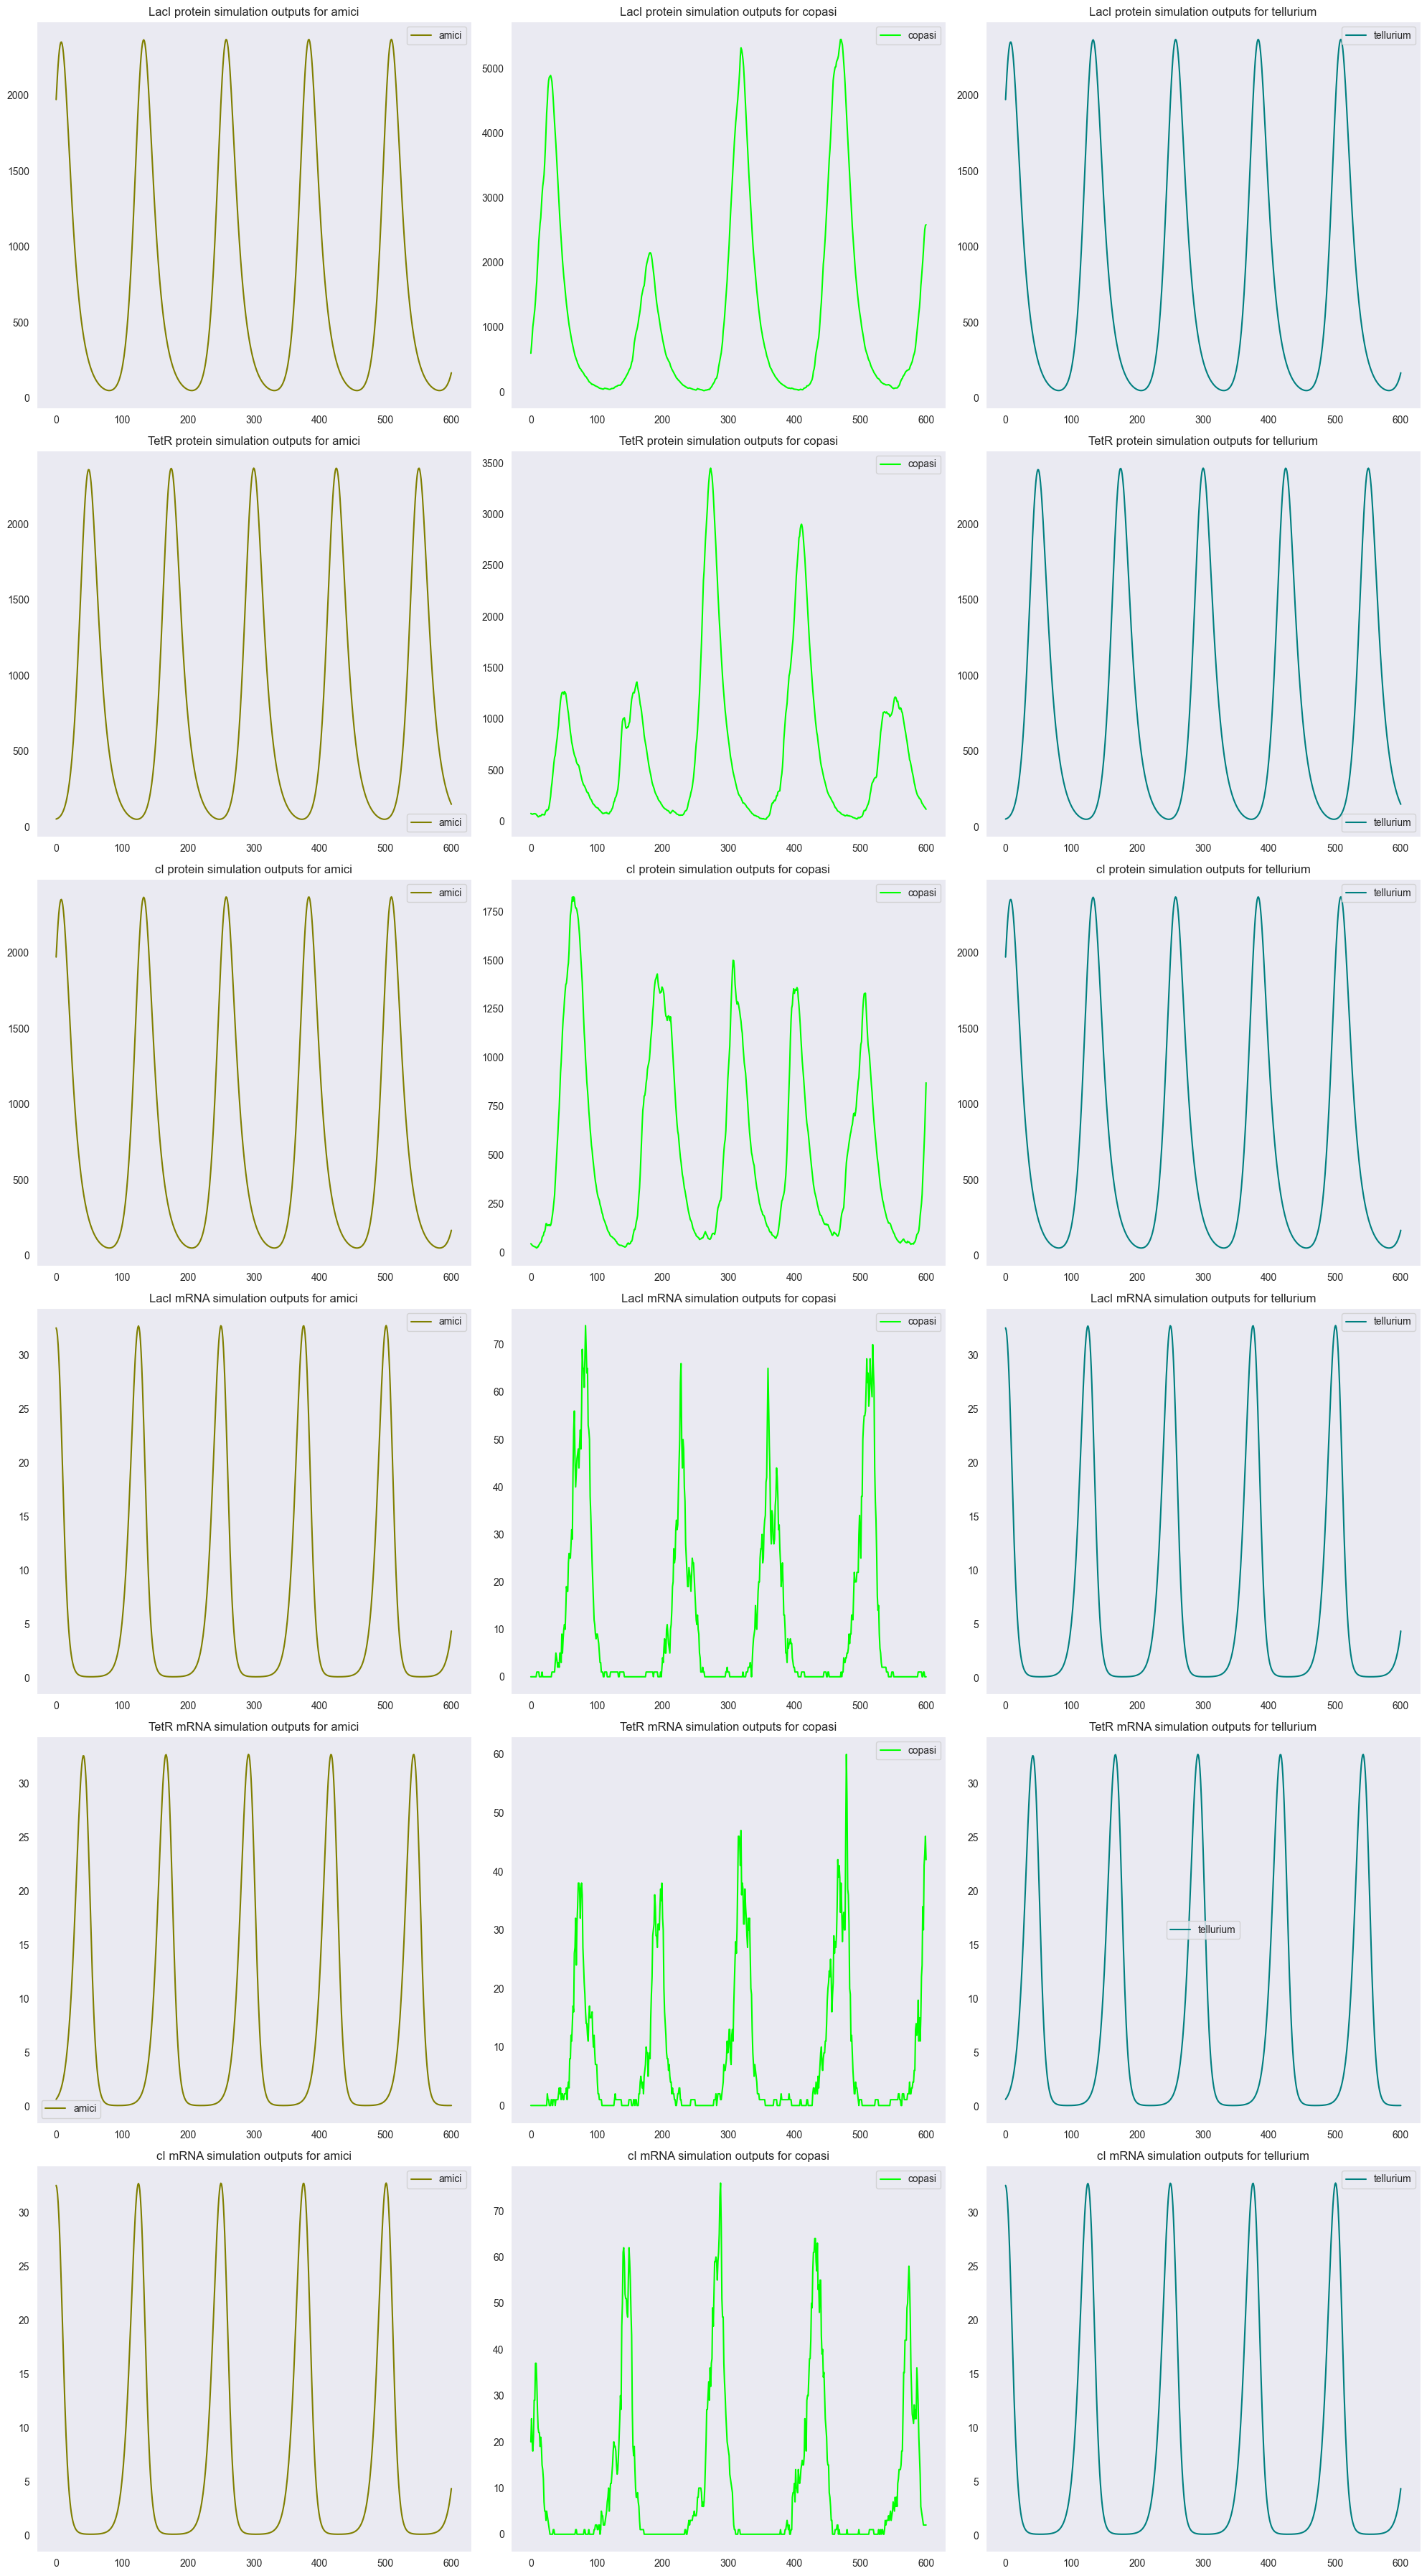

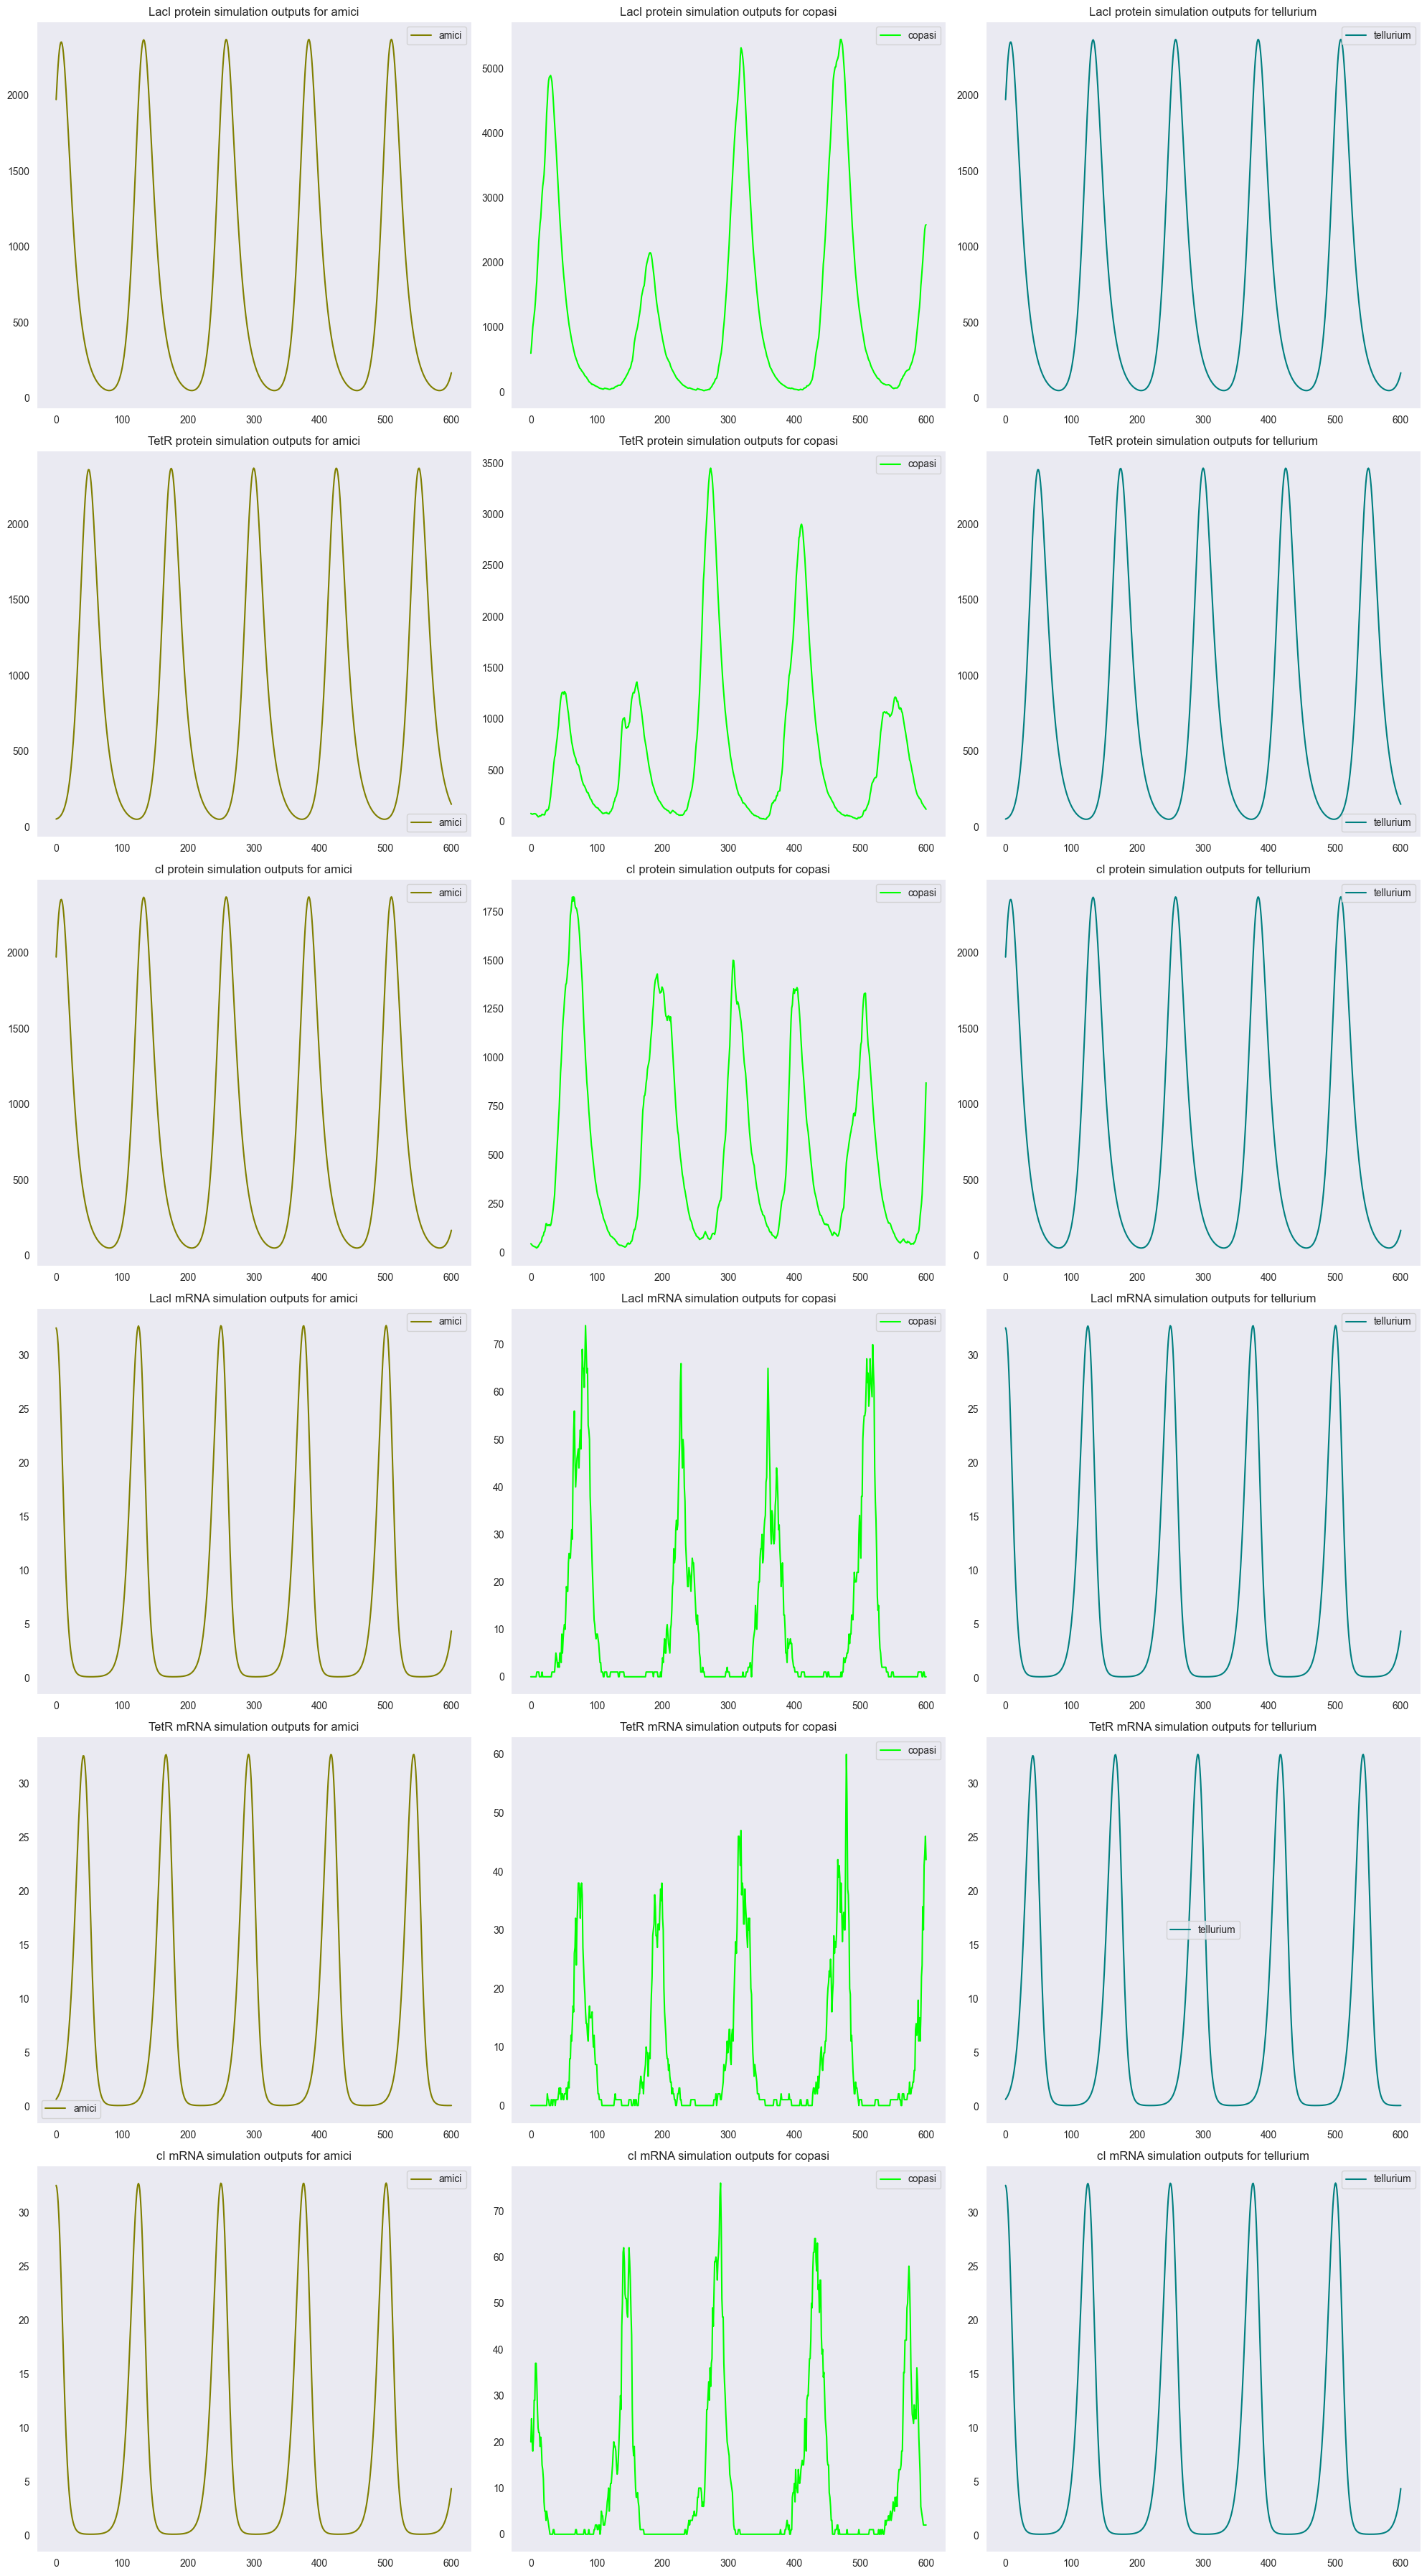

In [5]:
import numpy as np
test_id = 'utc_comparison_omex_caf121e9-65de-477e-8141-f36bf75f4df8'
test_data = verify.get_verify_output(test_id)
simulators = ['amici', 'copasi', 'tellurium']
t = np.linspace(400, 1000, 601)
verify.visualize(test_data, simulators, t[0], t[-1], num_points=t.shape[0])